# An Analysis of My Bank Statement

This analysis aims to provide insights into personal banking transactions over a specified period, focusing on spending patterns, income sources, and potential areas for budget optimization.

### Table of Contents
1. Preprocessing
2. Analysis
3. Conclusion and Key Insights
4. Reflections

First I will set up my environment with the libraries I will need for this analysis

In [77]:
# import pandas for data manipulation, seaborn and matplotlib for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Then I will import my data

In [78]:
data = pd.read_csv('MonzoDataExport_30Jan2023-28Dec2024_2024-12-28_183408.csv')

Now that my data is imported, I will check some features of the data to understand it better. How many rows and colums of data am I dealing with, what are the data types, are there missing values etc

Data Preprocessing

In [79]:
# This code lets me see the first five rows of my dataset
data.head()

,Transaction ID,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Notes and #tags,Address,Receipt,Description,Category split,Money Out,Money In
0,tx_0000ATJC2iU0VSm985DVYY,05/03/2023,14:48:10,Faster payment,John-Paul Akame,NaN,Transfers,1.35,GBP,1.35,GBP,Monzo-CQHKS,NaN,NaN,Monzo-CQHKS,NaN,NaN,1.35
1,tx_0000ATJKqZvpNCwoijW60S,05/03/2023,16:26:49,Card payment,Poundland,💵,Groceries,-1.00,GBP,-1.00,GBP,NaN,Wellgate Shopping Centre,NaN,POUNDLAND LTD DUNDEE GBR,NaN,-1.0,NaN
2,tx_0000ATL9KVuE5z6wbskzgH,06/03/2023,13:27:11,Faster payment,J Akame,NaN,Transfers,1.00,GBP,1.00,GBP,Monzo-CMGZW,NaN,NaN,Monzo-CMGZW,NaN,NaN,1.00
3,tx_0000ATL9XUzinM9WrqmTvV,06/03/2023,13:29:32,Faster payment,Linda Scott,NaN,Bills,-1.00,GBP,-1.00,GBP,John,NaN,NaN,John,NaN,-1.0,NaN
4,tx_0000ATLDkeD0FQBZ1gWD0E,06/03/2023,14:16:44,Faster payment,John-Paul Akame,NaN,Transfers,0.45,GBP,0.45,GBP,Monzo-SJYLS,NaN,NaN,Monzo-SJYLS,NaN,NaN,0.45


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   3425 non-null   object 
 1   Date             3425 non-null   object 
 2   Time             3425 non-null   object 
 3   Type             3425 non-null   object 
 4   Name             3341 non-null   object 
 5   Emoji            757 non-null    object 
 6   Category         3425 non-null   object 
 7   Amount           3425 non-null   float64
 8   Currency         3425 non-null   object 
 9   Local amount     3425 non-null   float64
 10  Local currency   3425 non-null   object 
 11  Notes and #tags  1409 non-null   object 
 12  Address          653 non-null    object 
 13  Receipt          9 non-null      object 
 14  Description      2027 non-null   object 
 15  Category split   0 non-null      float64
 16  Money Out        2160 non-null   float64
 17  Money In      

Based on what I can see at the moment, I will need to make some changes to the data types of some columns. Some columns are better stored as date, time, and category, instead of strings

In [81]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Type'] = data['Type'].astype('category')
data['Category'] = data['Category'].astype('category')

So I have converted the date and time columns into datetime datatypes, and I have converted the type and category columns into category datatypes

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction ID   3425 non-null   object        
 1   Date             3425 non-null   datetime64[ns]
 2   Time             3425 non-null   datetime64[ns]
 3   Type             3425 non-null   category      
 4   Name             3341 non-null   object        
 5   Emoji            757 non-null    object        
 6   Category         3425 non-null   category      
 7   Amount           3425 non-null   float64       
 8   Currency         3425 non-null   object        
 9   Local amount     3425 non-null   float64       
 10  Local currency   3425 non-null   object        
 11  Notes and #tags  1409 non-null   object        
 12  Address          653 non-null    object        
 13  Receipt          9 non-null      object        
 14  Description      2027 non-null   object 

Now, the next step is to drop the columns that I won't be using in this analysis. These columns include the Transaction ID, Emoji, Local Amount, Local Currency, Receipt, and Category split. I am removing these columns as they do not contain any data that will useful towards this analysis, or have repeated data

In [83]:
data.drop(['Transaction ID','Emoji','Local amount','Local currency', 'Receipt','Category split'], axis=1, inplace=True)

In [84]:
data.sample(5)

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
1883,2024-05-15,1900-01-01 19:33:24,Pot transfer,Home Pot,Transfers,250.00,GBP,NaN,NaN,NaN,NaN,250.0
1516,2024-02-04,1900-01-01 11:53:13,Faster payment,World Mission Agency,Charity,-38.65,GBP,Tithe,NaN,Tithe,-38.65,NaN
93,2023-04-26,1900-01-01 09:52:37,Card payment,Xplore Dundee,Transport,-4.00,GBP,NaN,44-48 East Dock Street,XPLORE DUNDEE (TAYSIDE +441382201121 GBR,-4.00,NaN
1115,2023-11-18,1900-01-01 17:08:32,Faster payment,John Akame,Transfers,1.00,GBP,Monzo-NBJXD,NaN,Monzo-NBJXD,NaN,1.0
27,2023-03-13,1900-01-01 13:31:23,Card payment,Lidl,Groceries,-1.18,GBP,NaN,16 South Ward Road,LIDL GB DUNDEE DUNDEE GBR,-1.18,NaN


I do not like the way my time column is also showing date, so I will remove it. I also do not want to have the negative sign on my Money Out column

In [85]:
data.Time = data.Time.dt.time
data.head()

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
0,2023-03-05,14:48:10,Faster payment,John-Paul Akame,Transfers,1.35,GBP,Monzo-CQHKS,NaN,Monzo-CQHKS,NaN,1.35
1,2023-03-05,16:26:49,Card payment,Poundland,Groceries,-1.00,GBP,NaN,Wellgate Shopping Centre,POUNDLAND LTD DUNDEE GBR,-1.0,NaN
2,2023-03-06,13:27:11,Faster payment,J Akame,Transfers,1.00,GBP,Monzo-CMGZW,NaN,Monzo-CMGZW,NaN,1.00
3,2023-03-06,13:29:32,Faster payment,Linda Scott,Bills,-1.00,GBP,John,NaN,John,-1.0,NaN
4,2023-03-06,14:16:44,Faster payment,John-Paul Akame,Transfers,0.45,GBP,Monzo-SJYLS,NaN,Monzo-SJYLS,NaN,0.45


In [86]:
# Multiply the column by -1 to remove the negativity of the values in the column
data['Money Out'] = data['Money Out'] * -1

data.head()

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
0,2023-03-05,14:48:10,Faster payment,John-Paul Akame,Transfers,1.35,GBP,Monzo-CQHKS,NaN,Monzo-CQHKS,NaN,1.35
1,2023-03-05,16:26:49,Card payment,Poundland,Groceries,-1.00,GBP,NaN,Wellgate Shopping Centre,POUNDLAND LTD DUNDEE GBR,1.0,NaN
2,2023-03-06,13:27:11,Faster payment,J Akame,Transfers,1.00,GBP,Monzo-CMGZW,NaN,Monzo-CMGZW,NaN,1.00
3,2023-03-06,13:29:32,Faster payment,Linda Scott,Bills,-1.00,GBP,John,NaN,John,1.0,NaN
4,2023-03-06,14:16:44,Faster payment,John-Paul Akame,Transfers,0.45,GBP,Monzo-SJYLS,NaN,Monzo-SJYLS,NaN,0.45


I will now handle the columns that have null values and missing data

In [87]:
print(data.isnull().sum())

Date                  0
Time                  0
Type                  0
Name                 84
Category              0
Amount                0
Currency              0
Notes and #tags    2016
Address            2772
Description        1398
Money Out          1265
Money In           2160
dtype: int64


The Notes and #tags, Address, Description, Money Out, and Money In columns have null values in them. Based on what I understand, some types of transactions do not have any notes and #tags whilst others have e.g. transfers and faster payments. Looking at it now, this column doesn't add that much information to the analysis. The column seems to serve as an adjective for the Description column. I can remove the column but, I will choose to leave it as it is since it might offer some insights into my spending habits no matter how small.

Like the description column, some types of transactions do not come with location data. It seems to be only card payments that come with location data. I will replace all null values in the Address column with 'Phone' as this was most likely where the transaction was carried out. 

I will convert the null values in the money in and money out columns to 0

---
## Handling missing data and null values

Since description is like the reference included in transactions, I want to see if the null values in the Description column are related to the Type of transaction that occurred

In [88]:
data[data['Description'].isnull()]['Type'].unique()

['Pot transfer', 'Monzo-to-Monzo']
Categories (8, object): ['Bacs (Direct Credit)', 'Card payment', 'Direct Debit', 'Faster payment', 'Flex', 'Monzo-to-Monzo', 'Pot transfer', 'rewards']

In [89]:
data[data.Type=='Monzo-to-Monzo']

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
240,2023-06-13,06:26:09,Monzo-to-Monzo,Temitayo Oniyelu,Gifts,-8.3,GBP,Wednesday,NaN,NaN,8.3,NaN
749,2023-08-29,07:53:33,Monzo-to-Monzo,Reign-El Mukoro,Gifts,-5.0,GBP,JP,NaN,NaN,5.0,NaN
767,2023-09-01,03:43:34,Monzo-to-Monzo,Temitayo Oniyelu,Finances,-10.0,GBP,Repaid the £10 I borrowed,NaN,NaN,10.0,NaN
884,2023-09-14,16:46:25,Monzo-to-Monzo,Temitayo Oniyelu,Shopping,-0.5,GBP,Money for slippers,NaN,NaN,0.5,NaN
908,2023-09-19,09:53:27,Monzo-to-Monzo,Temitayo Oniyelu,Expenses,-20.0,GBP,Refunded the borrowed money from Tayo for goin...,NaN,NaN,20.0,NaN
1637,2024-03-06,16:49:00,Monzo-to-Monzo,Temitayo Oniyelu,Expenses,-15.0,GBP,The money I borrowed to give mum and used to b...,NaN,NaN,15.0,NaN
2101,2024-06-27,10:36:50,Monzo-to-Monzo,Ndugatuda Maxwell,Gifts,-10.0,GBP,John-Paul Akame,NaN,NaN,10.0,NaN
2146,2024-07-04,16:15:19,Monzo-to-Monzo,Oluwatoyin Akinjiola,Finances,-2.0,GBP,NaN,NaN,NaN,2.0,NaN
2170,2024-07-13,16:12:13,Monzo-to-Monzo,Bidemi Abe,Gifts,-10.0,GBP,Pastor Tim,NaN,NaN,10.0,NaN


From the above, I can see that two unique types of transactions do not have a description: pot transfers and monzo-to-monzo transfers. I will fill the null values in their respective description column with the transaction type.

In [90]:
# Fills the null values of the dataframe slice with a string and assigns the result back to the dataframe slice
data.loc[data.Type=='Monzo-to-Monzo', 'Description'] = data.loc[data.Type=='Monzo-to-Monzo', 'Description'].fillna('Monzo-to-Monzo')
data.loc[data.Type=='Pot transfer', 'Description'] = data.loc[data.Type=='Pot transfer', 'Description'].fillna('Pot transfer')

I will replace the null values in the money out and money in columns to 0. I will also change the null values of the Address column to 'Mobile Phone', as these transactions were not card payments and happened through the bank app.

In [91]:
data[['Money In', 'Money Out']] = data[['Money In', 'Money Out']].fillna(0)
data.Address.fillna('Mobile Phone', inplace = True)
data.head()

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
0,2023-03-05,14:48:10,Faster payment,John-Paul Akame,Transfers,1.35,GBP,Monzo-CQHKS,Mobile Phone,Monzo-CQHKS,0.0,1.35
1,2023-03-05,16:26:49,Card payment,Poundland,Groceries,-1.00,GBP,NaN,Wellgate Shopping Centre,POUNDLAND LTD DUNDEE GBR,1.0,0.00
2,2023-03-06,13:27:11,Faster payment,J Akame,Transfers,1.00,GBP,Monzo-CMGZW,Mobile Phone,Monzo-CMGZW,0.0,1.00
3,2023-03-06,13:29:32,Faster payment,Linda Scott,Bills,-1.00,GBP,John,Mobile Phone,John,1.0,0.00
4,2023-03-06,14:16:44,Faster payment,John-Paul Akame,Transfers,0.45,GBP,Monzo-SJYLS,Mobile Phone,Monzo-SJYLS,0.0,0.45


In [92]:
data.loc[data['Name'].isnull()]

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
1612,2024-02-26,17:41:37,rewards,NaN,Income,0.33,GBP,NaN,Mobile Phone,Cashback,0.00,0.33
1827,2024-04-23,15:36:57,Flex,NaN,Transfers,-5.66,GBP,Extra payment,Mobile Phone,Flex,5.66,0.00
1834,2024-04-24,15:13:09,Flex,NaN,Transfers,-10.00,GBP,Extra payment,Mobile Phone,Flex,10.00,0.00
1835,2024-04-24,15:13:25,Flex,NaN,Transfers,-1.78,GBP,"Early payment towards Lebara, Greggs",Mobile Phone,Flex,1.78,0.00
1842,2024-04-28,16:32:10,rewards,NaN,Income,0.78,GBP,NaN,Mobile Phone,Cashback,0.00,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3399,2024-12-24,18:06:43,Flex,NaN,Transfers,-2.00,GBP,Early payment towards Aldi,Mobile Phone,Flex,2.00,0.00
3401,2024-12-24,18:10:03,Flex,NaN,Transfers,-9.85,GBP,Extra payment towards Aldi,Mobile Phone,Flex,9.85,0.00
3402,2024-12-24,18:10:20,Flex,NaN,Transfers,-4.00,GBP,Extra payment towards Tesco,Mobile Phone,Flex,4.00,0.00
3403,2024-12-24,18:10:39,Flex,NaN,Transfers,-4.00,GBP,Extra payment towards Xplore Dundee,Mobile Phone,Flex,4.00,0.00


In [93]:
data.loc[data['Type'] == 'rewards', 'Name'] = data.loc[data['Type'] == 'rewards', 'Name'].fillna('Cashback')
data.loc[data['Type'] == 'Flex', 'Name'] = data.loc[data['Type'] == 'Flex', 'Name'].fillna('Credit card')
data.loc[data['Type'] == 'rewards']

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In
1612,2024-02-26,17:41:37,rewards,Cashback,Income,0.33,GBP,NaN,Mobile Phone,Cashback,0.0,0.33
1842,2024-04-28,16:32:10,rewards,Cashback,Income,0.78,GBP,NaN,Mobile Phone,Cashback,0.0,0.78
1970,2024-05-31,15:34:30,rewards,Cashback,Income,0.05,GBP,NaN,Mobile Phone,Cashback,0.0,0.05
2050,2024-06-14,17:09:50,rewards,Cashback,Income,0.24,GBP,NaN,Mobile Phone,Cashback,0.0,0.24
2626,2024-09-19,20:52:49,rewards,Cashback,Income,0.17,GBP,NaN,Mobile Phone,Cashback,0.0,0.17
2876,2024-10-16,05:13:18,rewards,Cashback,Income,0.01,GBP,NaN,Mobile Phone,Cashback,0.0,0.01
2883,2024-10-16,13:24:12,rewards,Cashback,Income,0.21,GBP,NaN,Mobile Phone,Cashback,0.0,0.21
3301,2024-12-12,20:12:35,rewards,Cashback,Income,0.11,GBP,NaN,Mobile Phone,Cashback,0.0,0.11


In [94]:
data.isnull().sum()

Date                  0
Time                  0
Type                  0
Name                  0
Category              0
Amount                0
Currency              0
Notes and #tags    2016
Address               0
Description           0
Money Out             0
Money In              0
dtype: int64

Now that I have handled the missing values in my dataset, I will check if there are any duplicate rows in the data

In [95]:
data[data.duplicated()]

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In


In [96]:
data.describe()

,Date,Amount,Money Out,Money In
count,3425,3425.000000,3425.000000,3425.000000
mean,2024-03-13 23:20:53.956204544,0.000631,26.608015,26.608645
min,2023-03-05 00:00:00,-5081.130000,0.000000,0.000000
25%,2023-09-10 00:00:00,-11.470000,0.000000,0.000000
50%,2024-03-28 00:00:00,-1.000000,1.000000,0.000000
75%,2024-09-12 00:00:00,5.000000,11.470000,5.000000
max,2024-12-28 00:00:00,4000.580000,5081.130000,4000.580000
std,NaN,185.610428,127.793956,129.242082


As there are no duplicates, I can now move on to analysing and visualising my data

---


## Analysis
For this analysis I will only be analysing my 2024 data

<!-- First, I will create some new sets of columns: month, day, and hour. This will make it possible for me to group my spendings based on these variables. I believe I will be able to glean more insights into my spending pattern this way -->

In [97]:
data['Month'] = data.Date.dt.month_name()
data['Day'] = data.Date.dt.day_name()
data['Hour'] = data.Time.apply(lambda x: f"{x.hour % 12 or 12}{'am' if x.hour < 12 else 'pm'}")
data['Year'] = data.Date.dt.year

data.head()

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In,Month,Day,Hour,Year
0,2023-03-05,14:48:10,Faster payment,John-Paul Akame,Transfers,1.35,GBP,Monzo-CQHKS,Mobile Phone,Monzo-CQHKS,0.0,1.35,March,Sunday,2pm,2023
1,2023-03-05,16:26:49,Card payment,Poundland,Groceries,-1.00,GBP,NaN,Wellgate Shopping Centre,POUNDLAND LTD DUNDEE GBR,1.0,0.00,March,Sunday,4pm,2023
2,2023-03-06,13:27:11,Faster payment,J Akame,Transfers,1.00,GBP,Monzo-CMGZW,Mobile Phone,Monzo-CMGZW,0.0,1.00,March,Monday,1pm,2023
3,2023-03-06,13:29:32,Faster payment,Linda Scott,Bills,-1.00,GBP,John,Mobile Phone,John,1.0,0.00,March,Monday,1pm,2023
4,2023-03-06,14:16:44,Faster payment,John-Paul Akame,Transfers,0.45,GBP,Monzo-SJYLS,Mobile Phone,Monzo-SJYLS,0.0,0.45,March,Monday,2pm,2023


In [98]:
data_2024 = data[data.Year == 2024]

---
### 1. What is my average monthly income, and how does it fluctuate monthly?

In [99]:
print(data_2024.Category.unique().tolist())

['Groceries', 'Savings', 'Transfers', 'Transport', 'Shopping', 'Eating out', 'Income', 'Family', 'Bills', 'Charity', 'Expenses', 'General', 'Entertainment', 'Personal care', 'Gifts', 'Finances']


In [100]:
salary = data_2024[(data_2024['Category'] == 'Income') & (data_2024['Name'] == 'Greggs') | (data_2024['Name'] == 'Adecco')]

In [101]:
# data_2024[(data_2024['Category'] == 'Income')|((data_2024['Money In']>0) & ((data_2024['Type'] != 'Pot transfer')|(data_2024['Category'] == 'Savings')))]

In [102]:
monthly_salary = salary.groupby('Month')['Amount'].sum()
monthly_salary.describe()

count      12.000000
mean     1991.973333
std       378.309470
min      1430.660000
25%      1753.257500
50%      1879.760000
75%      2381.582500
max      2569.850000
Name: Amount, dtype: float64

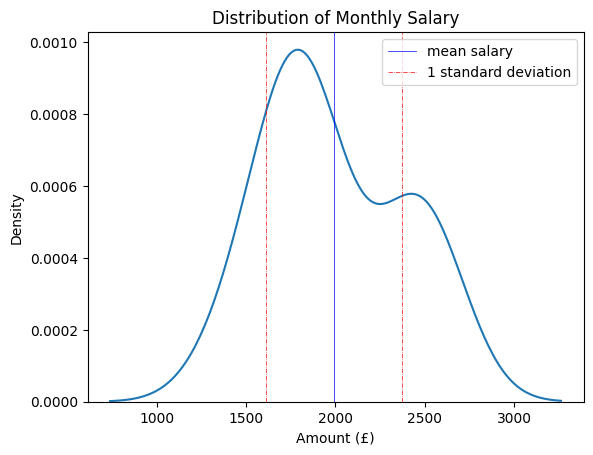

In [103]:
sns.kdeplot(monthly_salary)
plt.axvline(monthly_salary.mean(), color = 'b', linestyle = '-', linewidth=0.5, label = 'mean salary')
plt.axvline(monthly_salary.mean() + monthly_salary.std(), color = 'r', linestyle = '-.', linewidth=0.5, label = '1 standard deviation')
plt.axvline(monthly_salary.mean() - monthly_salary.std(), color = 'r', linestyle = '-.', linewidth=0.5)
plt.xlabel('Amount (£)')
plt.title('Distribution of Monthly Salary')
plt.legend()
plt.show()

Based on the above, my average monthly income is £1,991.97, with a standard deviation of £378

---
### 2. What percentage of my income am I saving versus spending each month?

First I will drop the Transfers column as they were transfers I made between my accounts and between pots because they will distort my analysis. The transfers I made to my accounts, which are not savings, were just to hold money till the time I needed them

In [104]:
data_2024_pivot = data_2024.groupby(['Month', 'Category'], observed=False)['Money Out'].sum()\
.reset_index()\
.pivot(columns='Category', index = 'Month', values = 'Money Out')\
.drop(columns='Transfers')

# data_2024_pivot

In [105]:
data_2024_pivot['Total Expenses'] = data_2024_pivot.drop(columns=['Savings']).sum(axis=1)

In [106]:
data_2024_pivot['Income'] = monthly_salary.values
data_2024_pivot['Savings Rate'] = (data_2024_pivot['Savings']/data_2024_pivot['Income']) * 100

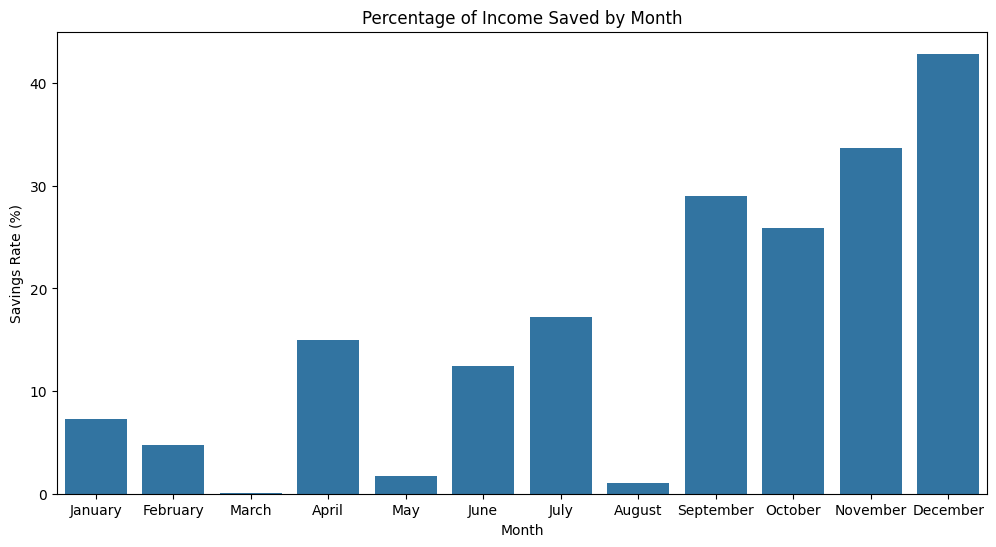

In [107]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12,6))
sns.barplot(data_2024_pivot, y='Savings Rate', x=data_2024_pivot.index, order=month_order)
plt.ylabel('Savings Rate (%)')
plt.title('Percentage of Income Saved by Month')

plt.show()


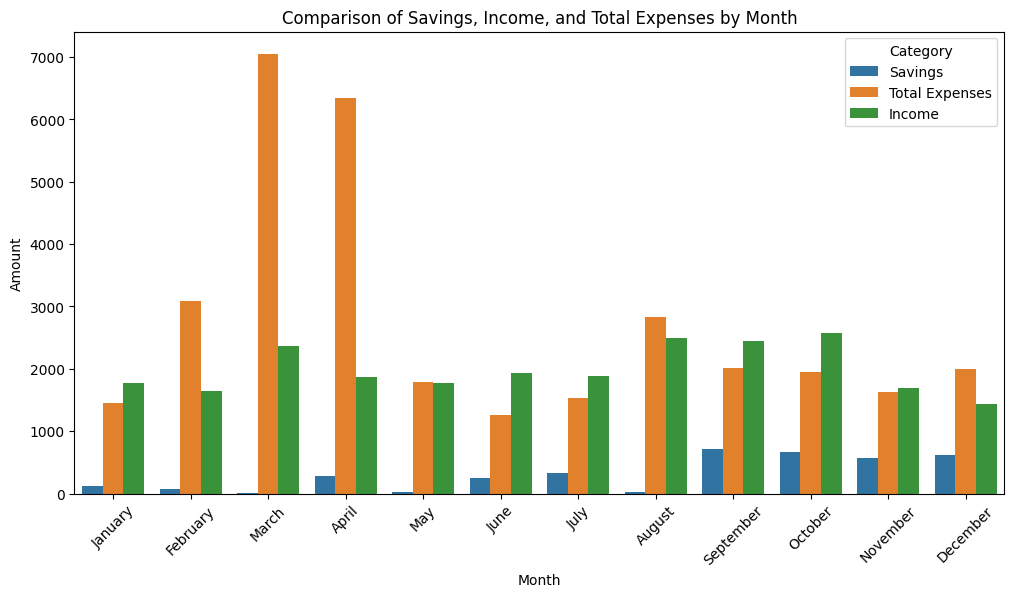

In [108]:
data_long = data_2024_pivot.reset_index().melt(id_vars='Month', value_vars=['Savings', 'Total Expenses', 'Income'], 
                                               var_name='Category', value_name='Amount')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=data_long, x='Month', y='Amount', hue='Category', order=month_order)
plt.title('Comparison of Savings, Income, and Total Expenses by Month')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

The above seems weird, as I am spending way more than I am earning. The reason why this is happening is because I have received transfers from people. These transfers are categorised automatically as income even though they aren't, since my income is just what I receive from my employers. What I would do now is to include the total inflow of money I have received to get a proper view of how things look

In [109]:
# Create a filter to subset the data to include rows where the Category is Income, or the Money In is greater than 0 and the Type isn't a Pot transfer 
filter = data_2024[(data_2024['Category'] == 'Income')|
                 ((data_2024['Money In']>0) & ((data_2024['Type'] != 'Pot transfer')))]
money_in = filter.groupby('Month')['Amount'].sum()
money_in

Month
April        6328.72
August       4019.75
December     2741.40
February     2359.85
January      2083.48
July         1925.25
June         2180.76
March        7410.51
May          3783.65
November     2288.25
October      3510.67
September    3372.87
Name: Amount, dtype: float64

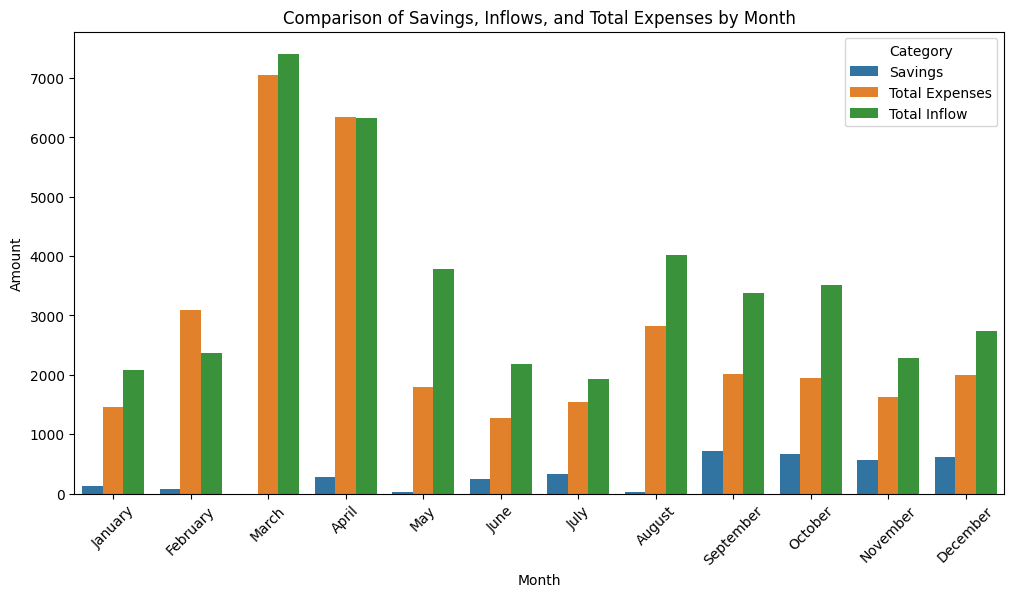

In [110]:
data_2024_pivot['Total Inflow'] = money_in.values

data_long = data_2024_pivot.reset_index().melt(id_vars='Month', value_vars=['Savings', 'Total Expenses', 'Total Inflow'], 
                                               var_name='Category', value_name='Amount')

plt.figure(figsize=(12, 6))
sns.barplot(data=data_long, x='Month', y='Amount', hue='Category', order=month_order)
plt.title('Comparison of Savings, Inflows, and Total Expenses by Month')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

Now, the chart is looking more reasonable. I would like to clarify that in months where my savings and total expenses are greater than the total income, I used what was left over from the previous month. 

Also, there is something weird with the data in May. I know I did not receive that much money during that period. So, I will check the inflows in May to find out what is going on. 

In [111]:
filter[filter['Month'] =='May']

,Date,Time,Type,Name,Category,Amount,Currency,Notes and #tags,Address,Description,Money Out,Money In,Month,Day,Hour,Year
1850,2024-05-02,00:00:28,Bacs (Direct Credit),Greggs,Income,351.27,GBP,1000 0015108700,Mobile Phone,1000 0015108700,0.0,351.27,May,Thursday,12am,2024
1861,2024-05-10,00:01:51,Bacs (Direct Credit),Greggs,Income,284.85,GBP,1000 0015108700,Mobile Phone,1000 0015108700,0.0,284.85,May,Friday,12am,2024
1869,2024-05-10,15:33:51,Faster payment,LEMFI,Transfers,1595.75,GBP,64274cdf-e28b,Mobile Phone,64274cdf-e28b,0.0,1595.75,May,Friday,3pm,2024
1877,2024-05-15,19:29:33,Bacs (Direct Credit),Greggs,Income,433.57,GBP,1000 0015108700,Mobile Phone,1000 0015108700,0.0,433.57,May,Wednesday,7pm,2024
1882,2024-05-15,19:32:55,Faster payment,AKAME J,Transfers,384.00,GBP,MONZO-WDXPZ,Mobile Phone,MONZO-WDXPZ,0.0,384.00,May,Wednesday,7pm,2024
1919,2024-05-23,00:00:07,Bacs (Direct Credit),Greggs,Income,300.87,GBP,1000 0015108700,Mobile Phone,1000 0015108700,0.0,300.87,May,Thursday,12am,2024
1939,2024-05-25,09:26:52,Faster payment,Adekola Adesokan,Bills,10.00,GBP,Sent from Revolut,Mobile Phone,Sent from Revolut,0.0,10.00,May,Saturday,9am,2024
1942,2024-05-25,14:47:04,Faster payment,AKAME J,Transfers,5.00,GBP,MONZO-WTYVG,Mobile Phone,MONZO-WTYVG,0.0,5.00,May,Saturday,2pm,2024
1949,2024-05-30,15:43:09,Bacs (Direct Credit),Greggs,Income,408.20,GBP,1000 0015108700,Mobile Phone,1000 0015108700,0.0,408.20,May,Thursday,3pm,2024
1967,2024-05-31,10:37:08,Faster payment,AKAME J,Transfers,10.00,GBP,MONZO-PZHBG,Mobile Phone,MONZO-PZHBG,0.0,10.00,May,Friday,10am,2024


I have seen where the issue came from. I had someone mistakenly send some to money to me which I returned. That is what is messing up with the analysis. What I will do now is to drop that row.

In [112]:
data_2024 = data_2024.drop(1869)

In [113]:
data_2024_pivot = data_2024.groupby(['Month', 'Category'], observed=False)['Money Out'].sum()\
.reset_index()\
.pivot(columns='Category', index = 'Month', values = 'Money Out')\
.drop(columns='Transfers')

In [114]:
filter = data_2024[(data_2024['Category'] == 'Income')|((data_2024['Money In']>0) & ((data_2024['Type'] != 'Pot transfer')&(data_2024['Category'] == 'Savings')))|((data_2024['Money In']>0) & ((data_2024['Type'] != 'Pot transfer')))]
money_in = filter.groupby('Month')['Amount'].sum()

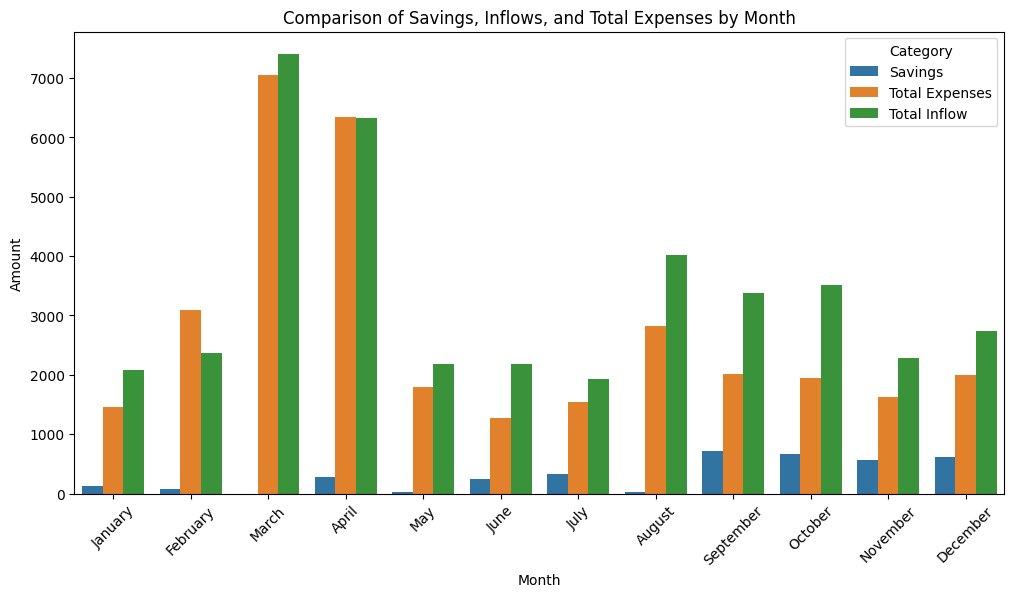

In [115]:
data_2024_pivot['Total Expenses'] = data_2024_pivot.drop(columns=['Savings']).sum(axis=1)
data_2024_pivot['Total Inflow'] = money_in.values

data_long = data_2024_pivot.reset_index().melt(id_vars='Month', value_vars=['Savings', 'Total Expenses', 'Total Inflow'], 
                                               var_name='Category', value_name='Amount')


plt.figure(figsize=(12, 6))
sns.barplot(data=data_long, x='Month', y='Amount', hue='Category', order=month_order)
plt.title('Comparison of Savings, Inflows, and Total Expenses by Month')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

---
### 3. What are my top 5 spending categories?

In [116]:
category_spend = data_2024.groupby('Category', observed=False)['Money Out'].sum().drop(index='Transfers').reset_index().sort_values(by='Money Out', ascending=False)
print(category_spend.head(5).to_string(index=False))

Category  Money Out
   Bills   14749.59
  Family    4744.23
Finances    4038.00
 Savings    3673.81
Expenses    2628.01


---
### 4. Do I tend to spend more on certain days of the week?

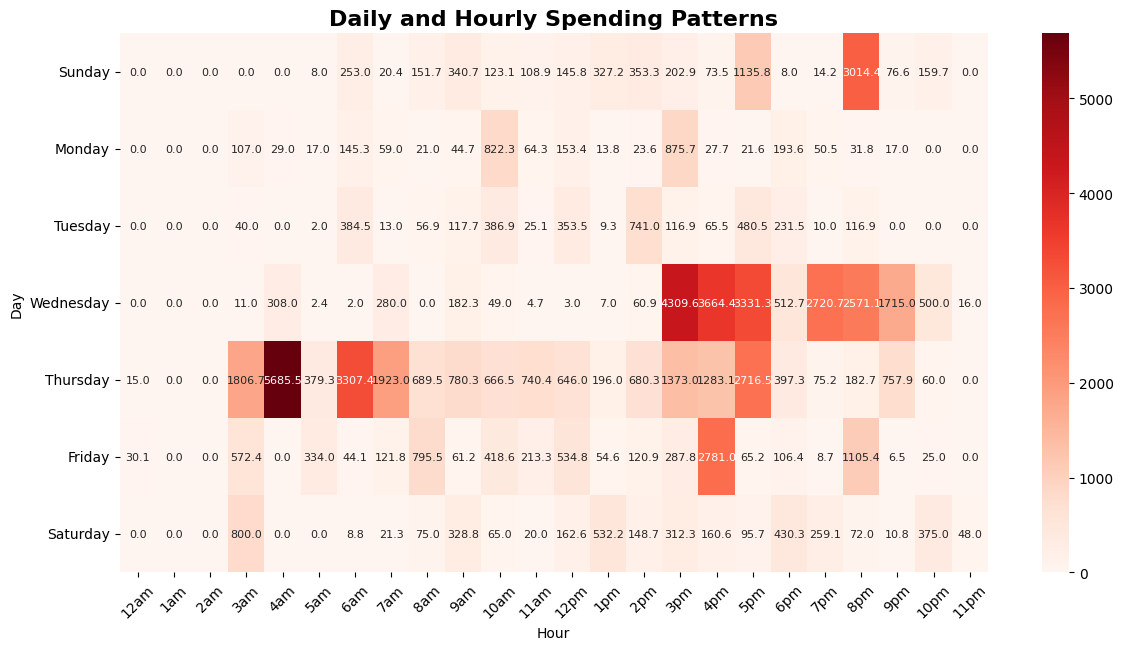

In [117]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data_2024['Day'] = pd.Categorical(data_2024['Day'], categories=day_order, ordered=True)
time_order = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
data_2024['Hour'] = pd.Categorical(data_2024['Hour'], categories=time_order, ordered=True)

heatmap_data = data_2024.pivot_table(index='Day', columns='Hour', values='Money Out', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.1f', annot_kws={"size": 8})
plt.title('Daily and Hourly Spending Patterns', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

It seems I spend the most on Wednesday and Thursday. This is because I receive my weekly pay on Thursday. Also, with my bank, Monzo, I am able to receive to my paycheck a day earlier on Wednesdays from 4pm. 

Seeing I spend a lot on Wednesday and Thursday, I will like to see which categories make up the bulk of my transactions on these days.

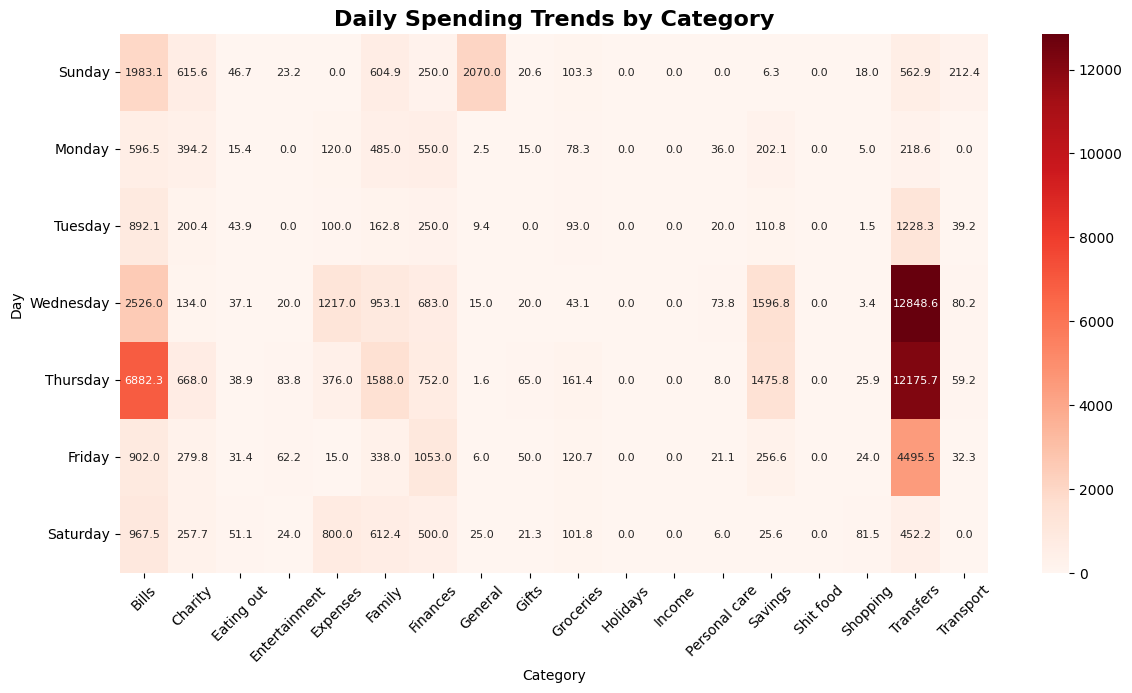

In [118]:

heatmap_data = data_2024.pivot_table(index='Day', columns='Category', values='Money Out', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.1f', annot_kws={"size": 8})
plt.title('Daily Spending Trends by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

From the above, the majority of my transactions on Wednesday and Thursday, are paying my bills, carrying out transfers to my pots or other accounts, putting money in savings, and sorting family

<Axes: title={'center': 'Distribution of Spending by Time'}, xlabel='Time', ylabel='Amount (£)'>

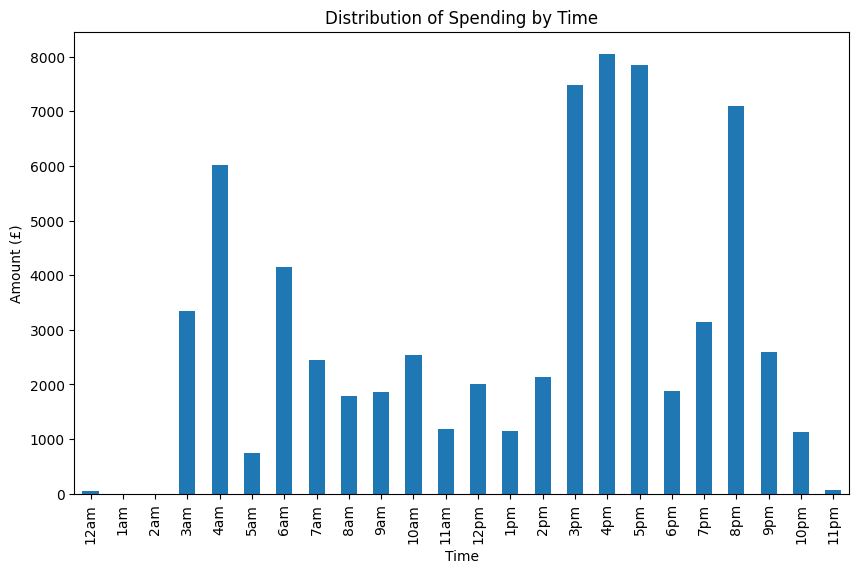

In [119]:
data_2024.groupby('Hour', observed=False)['Money Out'].sum()\
.plot.bar(title='Distribution of Spending by Time', xlabel='Time', ylabel='Amount (£)', figsize=(10,6))

In [120]:
data_2024_tree = data_2024[data_2024['Category']!='Transfers']

C:\Users\Dell XPS 13\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



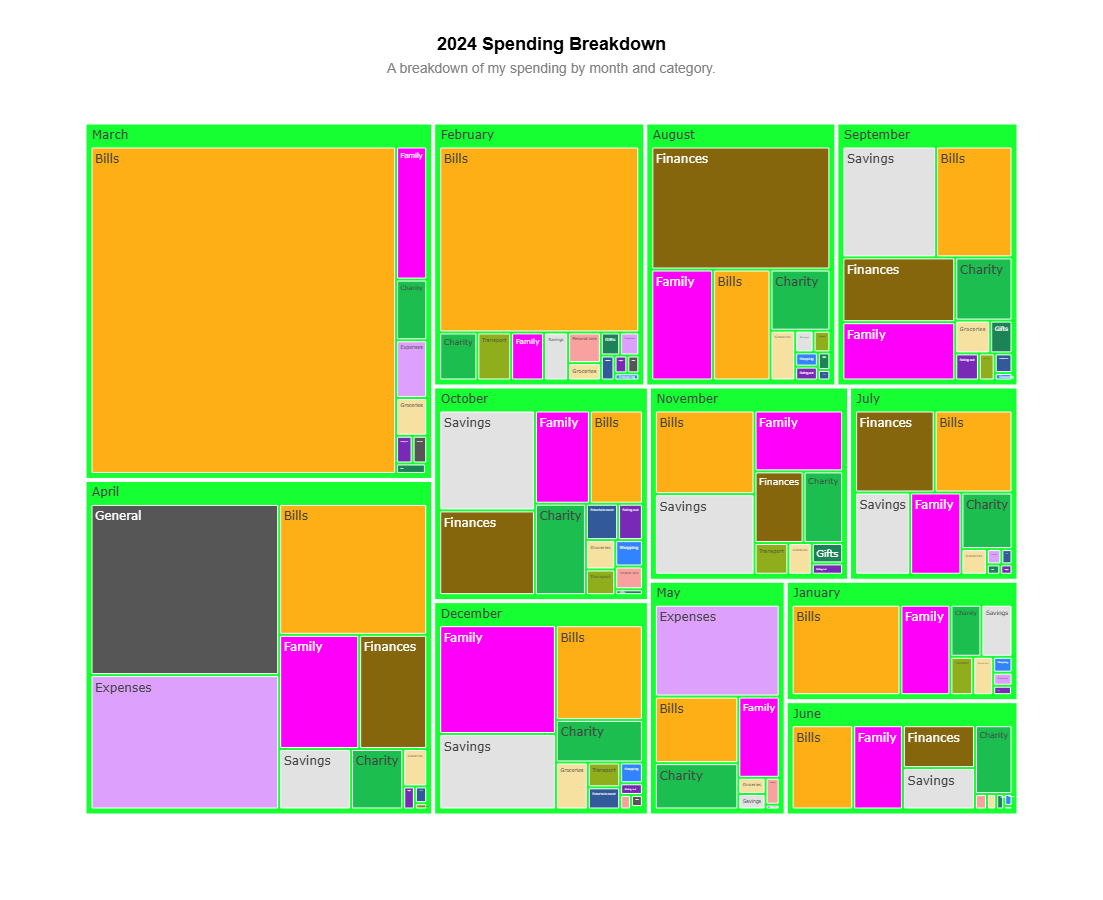

In [121]:
fig = px.treemap(data_2024_tree, 
                 path=['Month', 'Category'], 
                 values='Money Out', 
                 title='2024 Monthly Spending Breakdown', 
                 color='Category', 
                 color_discrete_sequence=px.colors.qualitative.Alphabet, 
                 width=1000, 
                 height=900, 
                 branchvalues='total',
                 hover_name='Category')

fig.update_layout(autosize=True, 
                  title={
        'text': "<b>2024 Spending Breakdown</b><br><span style='font-size:14px;color:gray;'>A breakdown of my spending by month and category.</span>",
        'x': 0.5,  
        'xanchor': 'center', 
        'yanchor': 'top'
    },
    title_font=dict(size=18, family='Arial, sans-serif', color='black'),  
    margin=dict(t=100)  
                 )

fig.update_traces(
    hovertemplate='<b>%{parent}<br></b>' +
                  '%{label}<br>' +
                  '£%{value:.2f}<extra></extra>',
    maxdepth=2
)

fig.show()

---
### 5. How does my card spending look like?

In [122]:
data_2024.query("Type == 'Card payment'")\
         .groupby('Category', observed=False)['Money Out'].agg(['sum','count'])\
         .sort_values('sum', ascending=False)

,sum,count
Category,,
Bills,9174.08,27
Family,2443.44,43
General,2070.00,3
Finances,610.00,3
Groceries,467.93,134
Transport,366.69,25
Charity,182.70,2
Eating out,162.66,84
Shopping,151.17,17


In [123]:
data_2024_tree = data_2024[data_2024['Type']=='Card payment']

In [124]:
data_2024_tree['Count'] = 1
data_2024_tree = data_2024_tree.groupby(['Category', 'Name'], observed=False).agg({'Money Out': 'sum', 'Count': 'count'}).reset_index()

C:\Users\Dell XPS 13\AppData\Local\Temp\ipykernel_16720\4266659940.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\Dell XPS 13\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Dell XPS 13\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



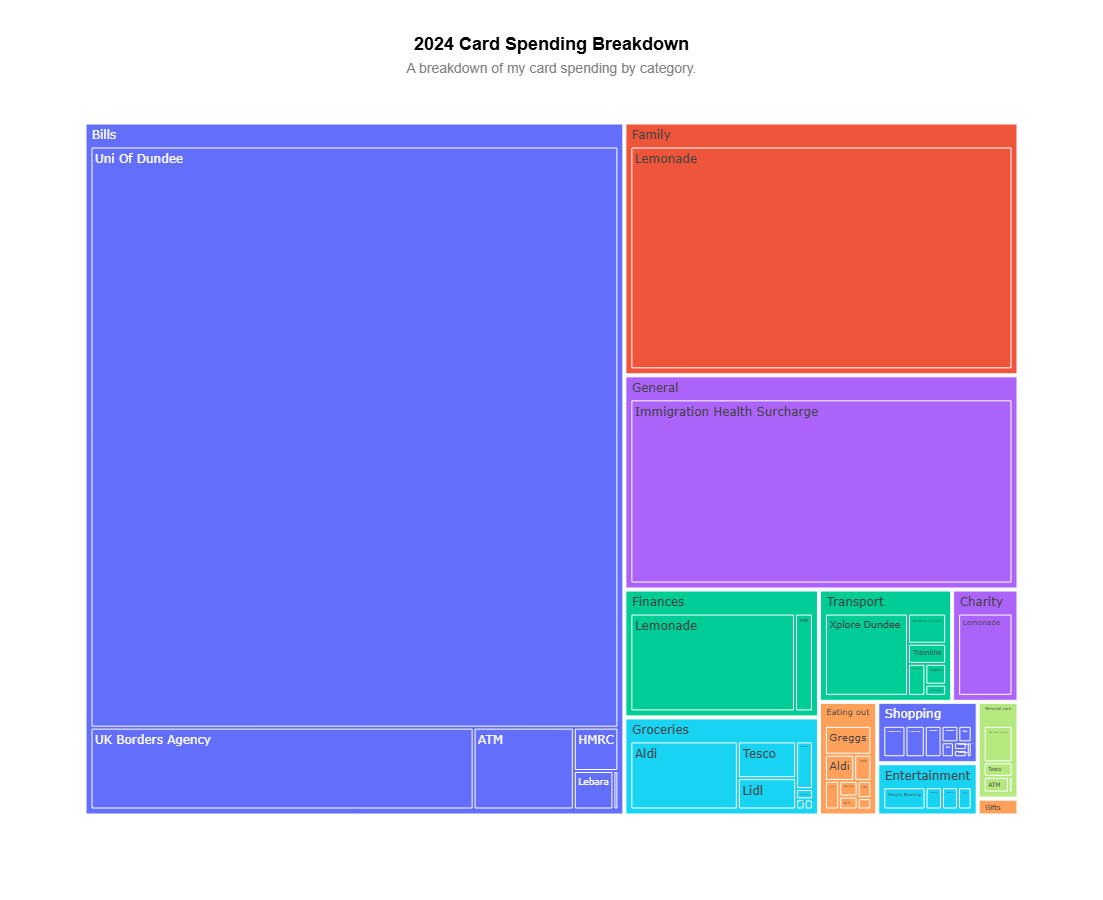

In [125]:
fig = px.treemap(data_2024_tree,
                 path=['Category', 'Name'], 
                 values='Money Out',
                 color='Category',
                 title='Breakdown of My Card Payments in 2024',
                 custom_data=['Count'],
                 width=1000,
                 height=900)

fig.update_layout(autosize=True, 
                  title={
        'text': "<b>2024 Card Spending Breakdown</b><br><span style='font-size:14px;color:gray;'>A breakdown of my card spending by category.</span>",
        'x': 0.5,  
        'xanchor': 'center', 
        'yanchor': 'top'
    },
    title_font=dict(size=18, family='Arial, sans-serif', color='black'),  
    margin=dict(t=100)  
                 )

fig.update_traces(
    hovertemplate=(
        "<b>Category:</b> %{parent}<br>" +
        "<b>Name:</b> %{label}<br>" +
        "<b>Amount:</b> £%{value:.2f}<br>" +
        "<b>Number of Payments:</b> %{customdata[0]}<extra></extra>"
    )
)

fig.show()

From the above, I can see I spent over a £160 eating out in 2024, with the majority of that occuring at Greggs. Since I don't want to spend this much eating out, I would like to know which days of the week and what time of the day I am more likely to swipe my card to buy food outside.

In [126]:
eating_out = data_2024[data_2024['Category']=='Eating out']

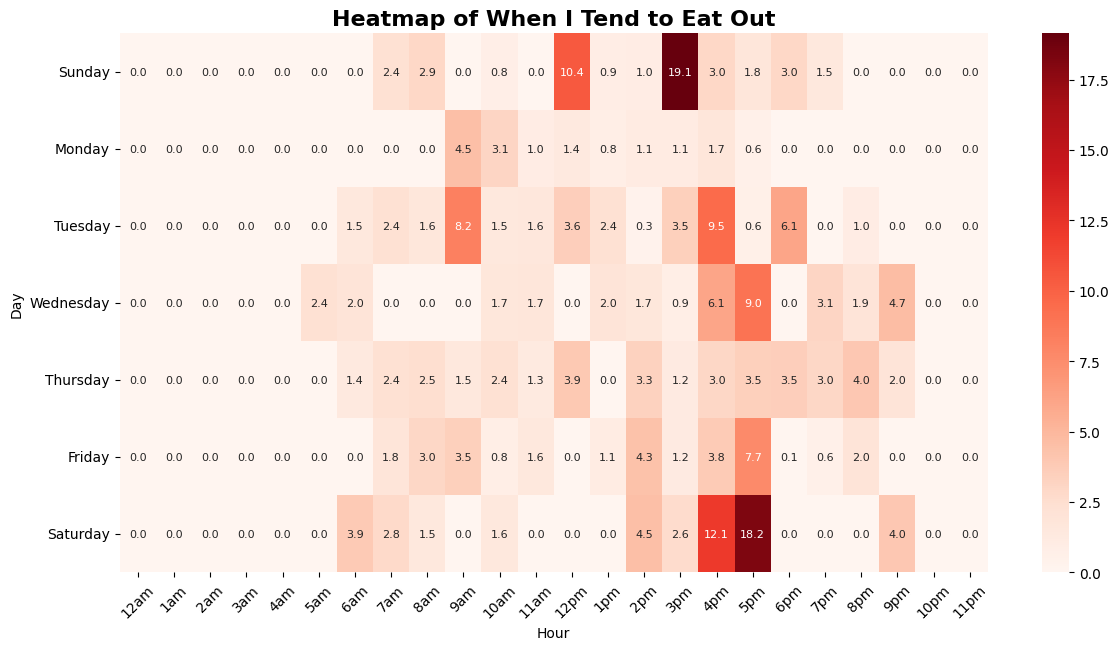

In [127]:

heatmap_data = eating_out.pivot_table(index='Day', columns='Hour', values='Money Out', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.1f', annot_kws={"size": 8})
plt.title('Heatmap of When I Tend to Eat Out', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('2023_spending_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [128]:
eating_out.groupby('Day', observed=False)['Money Out'].sum()\
.sort_values(ascending=False)

Day
Saturday     51.13
Sunday       46.73
Tuesday      43.86
Thursday     38.91
Wednesday    37.09
Friday       31.43
Monday       15.43
Name: Money Out, dtype: float64

## Conclusion and Key Insights
Based on my analysis, here are the key takeaways:

Income and Saving Habits: My average monthly income was £1,991.97, with monthly fluctuations of approximately £378. In the last quarter of 2024, I significantly improved my saving habits, managing to save nearly 40% of my income in December. This was made possible by consistently spending less than I earn, creating ample room for savings.

#### Spending Patterns:
**Top Spending Categories:** The majority of my spending went to Bills, Family, and Finances.
**Peak Spending Times:**
I spent the most on Wednesday and Thursday, particularly between 3 pm and 5 pm, making these times when I’m most likely to make impulse purchases.
The majority of transactions during these peak times were Transfers and Bill payments.

**Yearly Trends:**
I spent the most in March and April, driven by large tuition fee payments.
Aldi was my go-to grocery store throughout the year, while I spent over £30 with Barnado's, showing my support for sustainable, preloved clothing.

**Eating Out:**
I spent over £150 on eating out last year, which I consider excessive. I was more likely to eat out on weekends, particularly between 3 pm and 4 pm.

---

## Reflections
This analysis highlights areas where I can improve, such as limiting discretionary spending during peak spending times and further reducing my expenses on eating out. It also reaffirms the importance of maintaining strong saving habits, which enabled me to save a significant portion of my income during the final months of 2024.)

### Welcome to the end of my analysis. Thank you